# Project: Investigate Medical Dataset for No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

## Questions
1. Is Gender a significant variable to predict if a patient will show up for their scheduled appointment?
 
2. Are patients from a  particular age group tends to skip the medical appointments?
 
3. Waiting time influences patients not to show up?

4. Is there a weekday pattern where people do not show up for appointments?
 
5. Does Hypertension prevents patients to attend appointments?
 
6. The patients who receives SMS turn up more than the ones who didn't?

In [693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Load data

In [694]:
# Load CSV and create a dataframe df
df = pd.read_csv('noshow_data.csv')

### Basic information about Data

In [695]:
# no of samples and columns in the dataset
df.shape

(110527, 14)

In [696]:
# Datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [697]:
# initial look at the data
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [698]:
# gather descriptive statistics about data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Initial Data Summary
- The data has total 110527 rows with 14 columns.
- There are 13 independent variables and 1 dependednt variable No-show.
- The average age of the Patient is around 37 yrs
- Very few people have scholarships.
- Approx 20% of the Patients have Hypertension but others like Diabetes, Alcoholism is very low

In [699]:
# finding duplicate rows in the dataset
df.duplicated().sum()

0

No duplicated row found in data

In [700]:
# looking at unique count in columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [701]:
# Checking for any outliers in age
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Found Age = -1 and max = 115 that looks like human error. This value must be removed during data cleanup.

In [702]:
# checking Neighbourhood
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

Some of the hospital names like 'SÃO CRISTÓVÃO' contains special character but we don't need to treat them specially for our analysis

In [703]:
# unique values in Gender and Scholarship
print("Gender: {} Scholarship: {}".format(df['Gender'].unique(), df['Scholarship'].unique()))

Gender: ['F' 'M'] Scholarship: [0 1]


In [704]:
# unique values in Hipertension and Diabetes
print("Hipertension: {} Diabetes: {}".format(df['Hipertension'].unique(), df['Diabetes'].unique()))

Hipertension: [1 0] Diabetes: [0 1]


In [705]:
# unique values in Alcoholism and Handcap
print("Alcoholism: {} Handcap: {}".format(df['Alcoholism'].unique(), df['Handcap'].unique()))

Alcoholism: [0 1] Handcap: [0 1 2 3 4]


Note: As per the original Kaggle documentation https://www.kaggle.com/joniarroba/noshowappointments Handcap has only 2 values True or False. Something to take care during data cleanup. 

In [706]:
# unique values SMS_received and No-show
print("SMS_received: {} No-show: {}".format(df['SMS_received'].unique(), df['No-show'].unique()))

SMS_received: [0 1] No-show: ['No' 'Yes']


### Observation about data
1. Few columns like Handcap, Hipertension and No-show are misspelled and not consistent with other column names
2. PatientId and AppointmentID are not relevant to our analysis and needs to be dropped.
3. Minimum Age is -1 and Maximum age = 115 indicates there's human data error that needs further investigation.
4. Extract Date from ScheduledDay and AppointmentDay Columns
5. Convert datatype of ScheduledDay and AppointmentDay to datetime.
6. Need to find any outliers present in ScheduledDay and AppointmentDay where AppointmentDay is before ScheduledDay.
7. Correct Handicap Data values
8. We need to extract features like Waiting_Time, Weekday and Waiting_Periods which would be useful to answer few questions.

### 1. Cleaning Column Labels

In [707]:
# rename Handcap to Handicap, Hipertension to Hypertension and No-show to No_show
df = df.rename(columns = {'Handcap': 'Handicap', 'Hipertension': 'Hypertension','No-show': 'No_show'})

In [708]:
# check the columns are renamed
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### 2. Drop columns

In [709]:
# Patientid and AppointmentID columns are not used for analysis
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [710]:
# confirm the columns are dropped
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### 3. Remove outliers

In [711]:
# find number of rows where Age is between 0 and 100 (both inclusive) 
len(df.query("Age >=0 and Age <=100")), len(df)

(110519, 110527)

In [712]:
# drop ouliers in data
df = df.query("Age >=0 and Age <=100")

In [713]:
# check the rows are removed
len(df.query("Age < 0 and Age > 100"))

0

### 4. Extract Date from ScheduledDay and AppointmentDay Columns

In [714]:
# define a function to extract date
# function returns date object from datetime data passed as argument
def extract_date(d):
    return pd.to_datetime(d).date()

In [715]:
# extract date from ScheduledDay keeping same yyyy-MM-dd date format
df['ScheduledDay'] = df['ScheduledDay'].apply(extract_date)

In [716]:
# extract date from AppointmentDay
df['AppointmentDay'] = df['AppointmentDay'].apply(extract_date)

In [717]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [718]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
No_show           object
dtype: object

### 5. Convert datatype of ScheduledDay and AppointmentDay to datetime.

In [719]:
# convert object to datetime for ScheduleDay
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [720]:
# convert object to datetime for AppointmentDay
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [721]:
# verify both columns ScheduledDay and AppointmentDay are of type datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110519 non-null object
ScheduledDay      110519 non-null datetime64[ns]
AppointmentDay    110519 non-null datetime64[ns]
Age               110519 non-null int64
Neighbourhood     110519 non-null object
Scholarship       110519 non-null int64
Hypertension      110519 non-null int64
Diabetes          110519 non-null int64
Alcoholism        110519 non-null int64
Handicap          110519 non-null int64
SMS_received      110519 non-null int64
No_show           110519 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


### 6. Finding outlier in ScheduledDay and AppointmentDay Data

In [722]:
# check if scheduled date is after appointment date
outliers_date = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [723]:
# extract only outliers rows where date is < 0
outliers_date = outliers_date[outliers_date < 0]

In [724]:
# find size and row indexes
outliers_date.index, outliers_date.index.size

(Int64Index([27033, 55226, 64175, 71533, 72362], dtype='int64'), 5)

In [725]:
# removing 5 rows as they're treated as outliers or human error
df.drop(outliers_date.index, inplace=True)

In [726]:
df.shape

(110514, 12)

### 7. Correct Handicap Data values

In [727]:
# count of each value in Handicap Data
df.Handicap.value_counts()

0    108279
1      2036
2       183
3        13
4         3
Name: Handicap, dtype: int64

Since value = 0 has a count 108285, it's safe to assume other values [1,2,3,4] indicates the patient is Handicap. We need to convert  [1,2,3,4] to 1.

In [728]:
# converting [1,2,3,4] to 1 
df['Handicap'] = (df.Handicap > 0).astype(np.int)

In [729]:
# count values to confirm numbers match
df.Handicap.value_counts()

0    108279
1      2235
Name: Handicap, dtype: int64

### 8. Feature Extraction

#### 8.1 Waiting_Time in days - calculate difference of AppointmentDay and ScheduledDay

In [730]:
# calculating diffrence and converting to number of days
df['Waiting_Time'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [731]:
# verify Waiting_Time doesn't contains any negative values.
df['Waiting_Time'].min(), df['Waiting_Time'].max()

(0, 179)

In [732]:
# check new column Waiting_Time is created 
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_Time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


#### 8.2 Extracting Weekday from date

In [733]:
# create weekday dictionary for mapping numeric to weekday
mapDayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [734]:
# create new column Weekday to store weekday
df['Weekday'] = df['AppointmentDay'].dt.dayofweek.map(mapDayOfWeek)

In [735]:
# check the new column Weekday is created with correct values
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_Time,Weekday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday


In [736]:
df.shape

(110514, 14)

#### 8.3 Create Waiting_Period that categorizes time

In [737]:
# Bin edges that will be used to "cut" the data into groups
# we're dividing the waiting time into 5 groups based on number of days (waiting time)
bin_edges = [-1, 0, 7, 30, 90, 180 ]

In [738]:
# create bin names
bin_names = ['same day', '1 week', '1 month', '3 months', '6 months+']

In [739]:
# create column Waiting_Period
df['Waiting_Period'] = pd.cut(df['Waiting_Time'], bin_edges, labels=bin_names)

In [740]:
# verify Waiting_Period created
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_Time,Weekday,Waiting_Period
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,same day


<a id='eda'></a>
## Exploratory Data Analysis

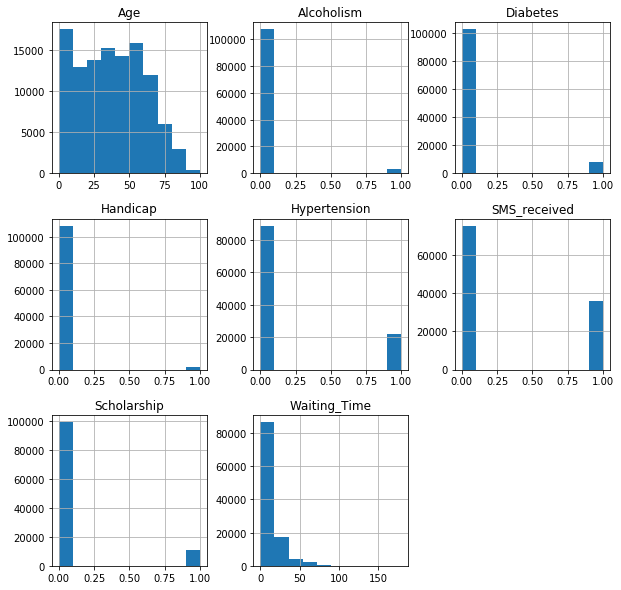

In [741]:
# Data distribution of numeric data
df.hist(figsize=(10,10));

### General Observation 
1. As per Age distrribution young and middle age patients are more as compared to old age.
2. Most people are not Handicap or Alcoholic or have diabetes.
3. Almost 20% of the patients have Hypertension and it would be interesting to combine with other categorical variables
4. Approx 35% of people receives SMS about appointment.
5. The waiting time is quite less for most of the appointment.

### Exploring Categorical Variables

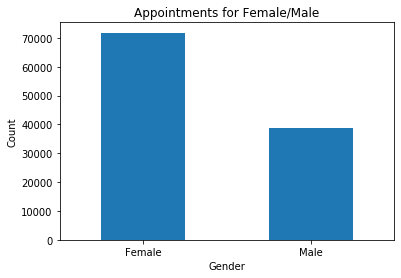

In [742]:
# Patient appointments by Gender
ax = df['Gender'].value_counts().plot(kind='bar');
ax.set_title('Appointments for Female/Male' )
ax.set_xticklabels(['Female', 'Male'], rotation=0);
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.show;

Above graph shows Females are almost frequeent visitors than Males. The percentage of Female Vs Male is 65/35.

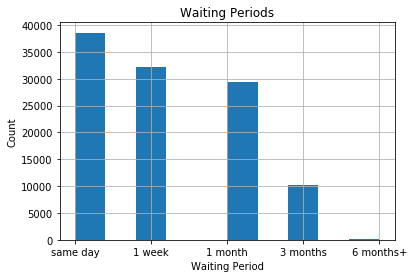

In [743]:
# lets see the distribution of Waiting_Period
ax = df.Waiting_Period.hist();
ax.set_title('Waiting Periods')
ax.set_xlabel('Waiting Period')
ax.set_ylabel('Count')
plt.show;

Most appointments are scheduled on same day.

In [744]:
# declare the sort order for weekdays
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

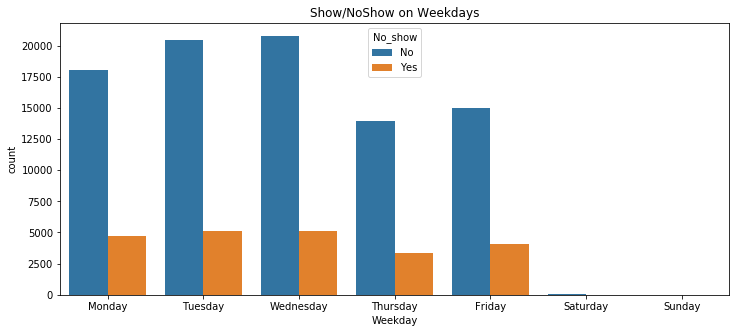

In [745]:
# Weekday plot against show/No Show
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df.Weekday, hue=df.No_show, order = week_order)
ax.set_title("Show/NoShow on Weekdays")
plt.show()

As seen above, there are more appointments at the start of the week than weekend.

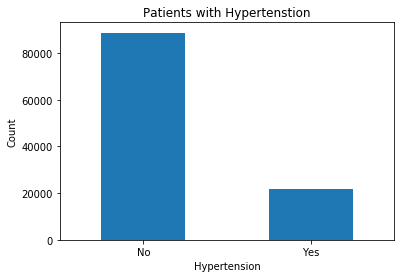

In [746]:
# count plot for patients having Hypertension
ax = df['Hypertension'].value_counts().plot(kind='bar', title='Patients with Hypertenstion');
ax.set_xticklabels(['No', 'Yes'], rotation=0);
ax.set_xlabel('Hypertension')
ax.set_ylabel('Count')
plt.show;

- Almost 20 % of the patients have Hypertension.

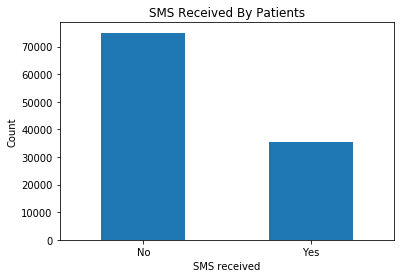

In [747]:
# count plot for SMS received
ax = df['SMS_received'].value_counts().plot(kind='bar', title='SMS Received By Patients');
ax.set_xticklabels(['No', 'Yes'], rotation=0);
ax.set_xlabel('SMS received')
ax.set_ylabel('Count')
plt.show;

- Around 32% of Patients have received SMS reminders

# Drawing Conclusions

### Q1.  Is Gender a significant variable to predict if a patient will show up for their scheduled appointment?

In [748]:
# get counts by Gender type
df['Gender'].value_counts()

F    71829
M    38685
Name: Gender, dtype: int64

In [749]:
# check the count for each Gender for show/no_show
pd.crosstab(df.Gender, df.No_show, margins=True, margins_name="Total")

No_show,No,Yes,Total
Gender,,,
F,57241,14588,71829
M,30962,7723,38685
Total,88203,22311,110514


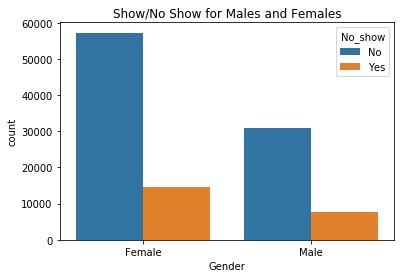

In [750]:
# Let's plot Show/No_Show appointments for Males and Females
ax = sns.countplot(x=df.Gender, hue=df.No_show, data=df)
ax.set_xticklabels(['Female', 'Male'])
ax.set_title('Show/No Show for Males and Females')
plt.show()

In [751]:
# let's check the proportion of Females for No show
df.query("Gender == 'F' and No_show == 'Yes'").size / df.query("Gender == 'F'").size

0.20309345807403695

In [752]:
# let's check the proportion of Males for No show
df.query("Gender == 'M' and No_show == 'Yes'").size / df.query("Gender == 'M'").size

0.19963810262375598

#### Observation:
- Both Females and Males have same proportion of 'No show' approx 20%.
- There's no clear trend that a specific Gender would show up for an appointment.

## Q2. Are patients from a particular age group tends to skip the medical appointments?

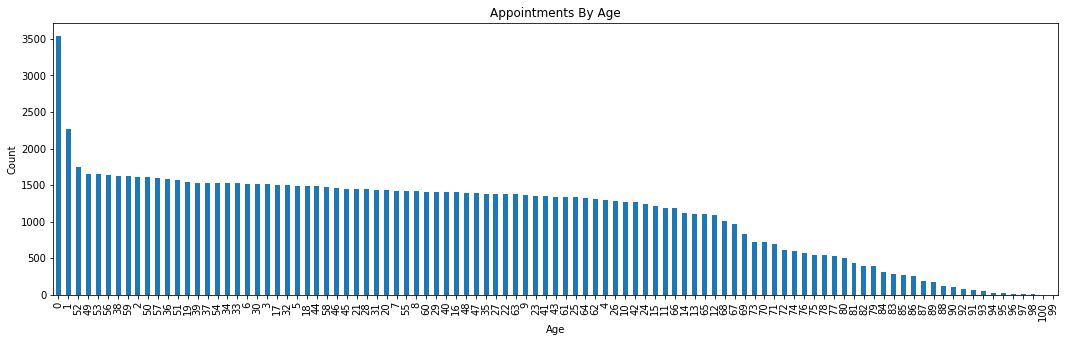

In [753]:
# let's look at the count of patients making appointments w.r.t Age
ax = df.Age.value_counts().plot(kind='bar', figsize=(18,5));
ax.set_title('Appointments By Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show();

In [754]:
# check the count for top 5 Age visitors
df.Age.value_counts().nlargest(5)

0     3539
1     2273
52    1746
49    1652
53    1651
Name: Age, dtype: int64

#### Observation:
- New born babies and small children are the most frequent visitors. 
- There's a decrease in hospital visits among older population after 60.

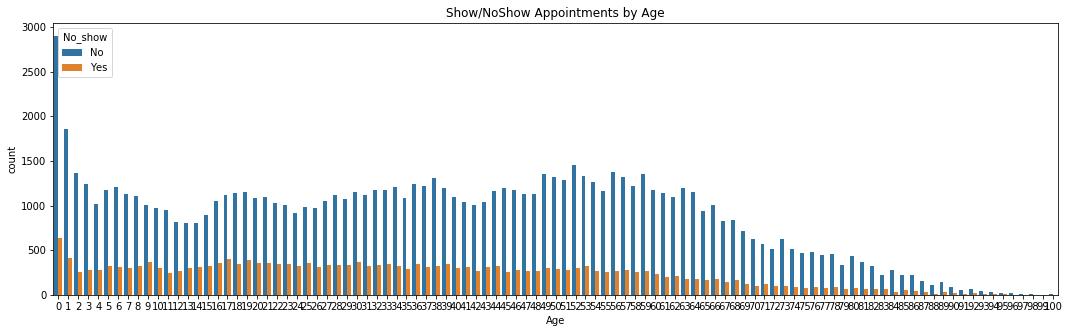

In [755]:
# Let's plot Age with Show/NoShow
plt.figure(figsize=(18,5))
ax = sns.countplot(x=df.Age, hue=df.No_show)
ax.set_title("Show/NoShow Appointments by Age")
plt.show()

In [756]:
# let's check the proportion of Age with 'no show'(Do not show for appointments)
no_show_prop = df.query("No_show == 'Yes'").groupby(['Age']).size() / df.groupby(['Age']).size()

In [757]:
# let's check the proportion of Age who showed up for appointments
show_prop = df.query("No_show == 'No'").groupby(['Age']).size()/df.groupby(['Age']).size()

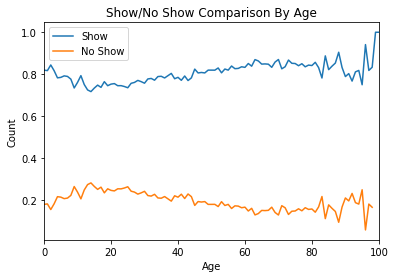

In [758]:
df_age_prop = pd.DataFrame({'Show': show_prop,'No Show': no_show_prop})
ax = df_age_prop.plot.line()
ax.set_title('Show/No Show Comparison By Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show();

#### Observations:
- Show -> Around 80% of all Age group show up for the appointments.
- No Show -> There's an increase in trend among very young population and upto 15 yrs of age. 
   This increase in trend starts declining after 20 yrs of age and continues for old age patients.

### Q3. Waiting time influences patients not to show up?


In [759]:
# check the counts for Waiting_Period for show/no_show
pd.crosstab(df.Waiting_Period, df.No_show, margins=True, margins_name="Total")

No_show,No,Yes,Total
Waiting_Period,,,
same day,36768,1792,38560
1 week,24412,7770,32182
1 month,20070,9325,29395
3 months,6792,3368,10160
6 months+,161,56,217
Total,88203,22311,110514


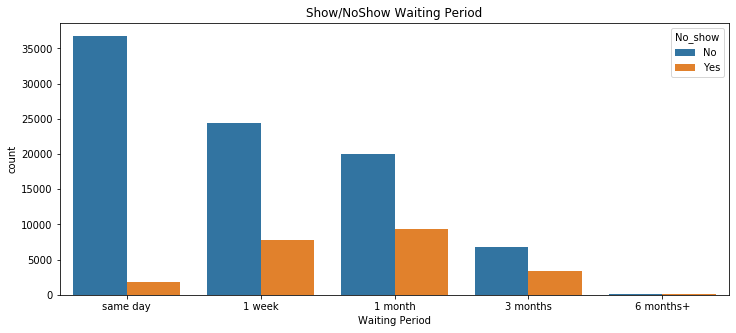

In [760]:
# plot waiting period against Show/No Show
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df.Waiting_Period, hue=df.No_show)
ax.set_title("Show/NoShow Waiting Period")
ax.set_xlabel('Waiting Period')
plt.show();

In [761]:
# calculate percentage Waiting Period for Patients who showed up
show_wtg_prop = df.query("No_show == 'No'").groupby(['Waiting_Period']).size()/df.groupby(['Waiting_Period']).size()

In [762]:
# calculate percentage Waiting Period for Patients who DO NOT show up
no_show_wtg_prop = df.query("No_show == 'Yes'").groupby(['Waiting_Period']).size()/df.groupby(['Waiting_Period']).size()

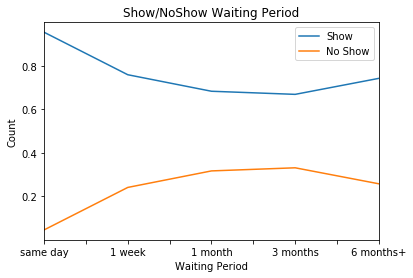

In [763]:
# Let's plot both to get a pattern 
df_wtg_prop = pd.DataFrame({'Show': show_wtg_prop,'No Show': no_show_wtg_prop})
ax = df_wtg_prop.plot.line()
ax.set_title('Show/NoShow Waiting Period')
ax.set_xlabel('Waiting Period')
ax.set_ylabel('Count')
plt.show();

#### Observation:
- Patients prefer same day appointments. 
- As the waiting period gets higher patients tend to miss appointments .

### Question 4. Is there a weekday pattern where people do not show up for appointments?

In [764]:
no_show_wk_prop = df.query("No_show == 'Yes'").groupby(['Weekday']).size()/df.groupby(['Weekday']).size()

In [765]:
no_show_wk_prop.sort_values(ascending=False)

Weekday
Saturday     0.230769
Friday       0.212273
Monday       0.206420
Tuesday      0.200882
Wednesday    0.196861
Thursday     0.193412
dtype: float64

The proportion of show/No show is not very significant throughout the week and there's no clear pattern emerging out of weekday data.

### Question 5. Hypertension prevents patients to attend appointments?

In [766]:
# Let's check the percentage of Hypertension Patients with show/No_show
pd.crosstab(df.Hypertension, df.No_show, normalize = "index")

No_show,No,Yes
Hypertension,,
0,0.791025,0.208975
1,0.826972,0.173028


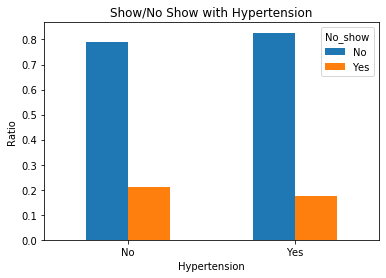

In [767]:
ax = pd.crosstab(df.Hypertension, df.No_show, normalize = "index").plot(kind='bar', title='Show/No Show with Hypertension');
ax.set_xticklabels(['No', 'Yes'], rotation=0);
ax.set_xlabel('Hypertension')
ax.set_ylabel('Ratio')
plt.show();

#### Observation:
- 17% of Patients who missed the appointments have Hypertension.
- 80 % of Pateints with Hypertension do show up for the appointment.

### Question 6. The patients who receives SMS turn up more than the ones who didn't?

In [768]:
# lets check the proportion of SMS received with Show/No Show
pd.crosstab(df.SMS_received, df.No_show, normalize = "index")

No_show,No,Yes
SMS_received,,
0,0.833047,0.166953
1,0.724247,0.275753


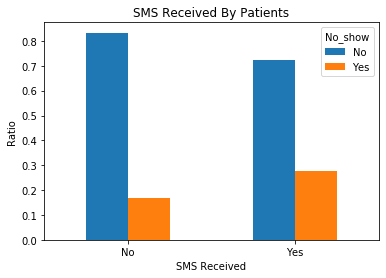

In [769]:
ax = pd.crosstab(df.SMS_received, df.No_show, normalize = "index").plot(kind='bar');
ax.set_xticklabels(['No', 'Yes'], rotation=0);
ax.set_title('SMS Received By Patients')
ax.set_xlabel('SMS Received')
ax.set_ylabel('Ratio')
plt.show();

#### Observation: 
- The pateints who received SMS has lower show-up percentage than the ones who received it. 
- This is negative trend and looks like sending SMS to patients as a reminder is not helping much.

<a id='conclusions'></a>
## Conclusions
1. Parents of new born babies and Infants tend to miss appointments more than old age Patients
2. Patients prefer Same Day appointment. With increase in waiting time, this percentage decreases.
3. Other factors like Gender, Hypertension, Weekday, SMS Received are not important. 

### Hence based on analysis, we could conclude that Age and Same Day appointments are important factors to predict if patient will show up for their scheduled appointment. 

## Limitations
1. AppointmentDay time is set to 00:00:00Z which is not very useful to analyze waiting time with respect to hours. It makes ScheduledDay time irrelevant as well. Had there been time available for AppointmentDay, we would know the time interval between ScheduledDay and AppointmentDay for same day appointments.
2. Handicap values as per documentation are True/False, but actual values found to be in range of 0 to 4. Looks like such values represents level of disability of a patient. Moreover, no more information is provided.